In [1]:
from classical_evolution import * 

# Eckart Barrier

In [2]:
# Problem setup
T = .6
x0 = -3.0  # Initial position
p0 = 15.0  # Initial momentum
sigma = 0.5
L = 5    # Spatial domain [-L, L]

def eckart_initial_wave_function(x):
    val = np.exp(-(x - x0)**2 / (2 * sigma**2) + 1j*p0*(x - x0))
    normalize = lambda x: x / np.linalg.norm(x)
    return normalize(val)

eckart_potential  = lambda x: 100/np.cosh(x/.5)

working on time evolution: 100%|██████████| 500/500 [00:00<00:00, 14944.11it/s]


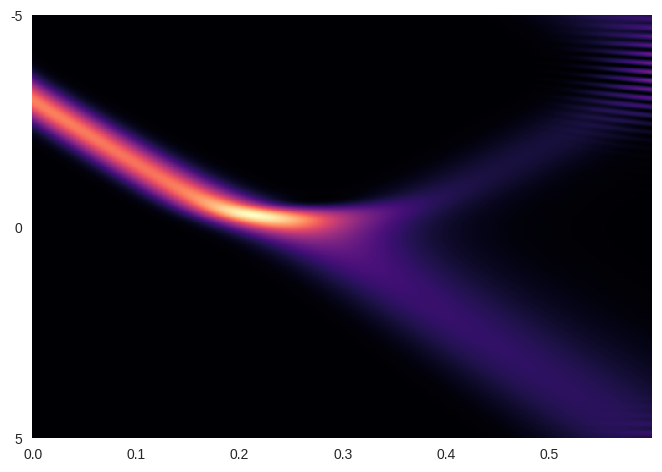

In [3]:
N = 500
K = 500
f = lambda input: 0
states, t_grid, x_grid = time_evolve(eckart_potential , eckart_initial_wave_function, N, L, K, T, f, ord=1, D=1/2)
amplitudes = np.abs(states)**2
plot_time_evolution(amplitudes, t_grid, x_grid, interpolate_plot=False)

working on time evolution: 100%|██████████| 2048/2048 [00:00<00:00, 4413.46it/s]


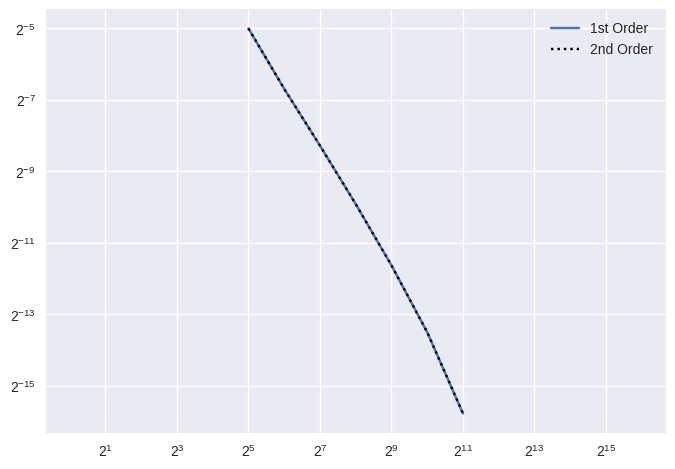

In [4]:
n_true, k_true = 12, 12
fake_true_sol = time_evolve(eckart_potential, eckart_initial_wave_function, 2**n_true, L, 2**k_true, T, f, ord=2)[0][-1, :]

n_vals, k_vals = [n for n in range(5, 12)], [k for k in range(5, 12)]
error1, error2 = [], []
i = 0
for n, k in zip(n_vals, k_vals):
    states1, t_grid1, x_grid1 = time_evolve(eckart_potential, eckart_initial_wave_function, 2**n, L, 2**k, T, f, ord=1)
    states2, t_grid2, x_grid2 = time_evolve(eckart_potential, eckart_initial_wave_function, 2**n, L, 2**k, T, f, ord=2)
    error1.append(np.sqrt(np.sum(np.abs(states1[-1, :][::2**i] - fake_true_sol[::2**(n_true - min(n_vals))])**2))/len(x_grid1))
    error2.append(np.sqrt(np.sum(np.abs(states2[-1, :][::2**i] - fake_true_sol[::2**(n_true - min(n_vals))])**2))/len(x_grid2))
    i += 1

plt.loglog([2**k for k in k_vals], error1, base=2)
plt.loglog([2**k for k in k_vals], error2, base=2, linestyle=':', color='k')
plt.legend(['1st Order', '2nd Order'])
plt.axis('equal')
plt.show()

# Soliton

working on time evolution: 100%|██████████| 1000/1000 [00:00<00:00, 24218.21it/s]


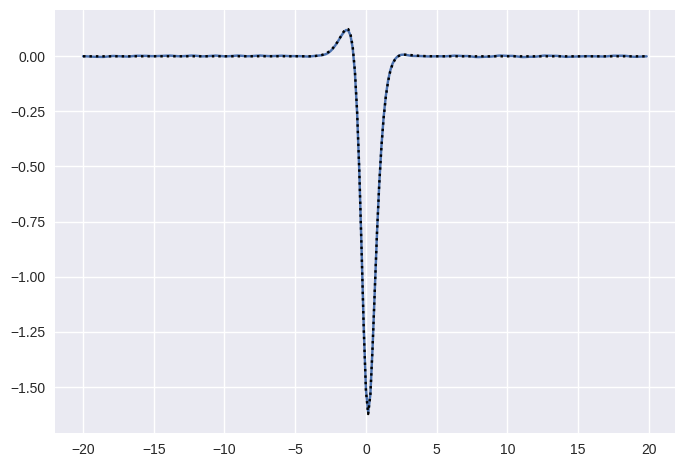

In [5]:
A = 2
beta = -1
v = 1
x0 = -10
L = 20
theta0 = 0
true_sol = lambda x, t: A/np.sqrt(-beta)/np.cosh(A*(x-v*t-x0))*np.exp(1j*(v*x-1/2*(v**2-A**2)*t+theta0))

soliton_potential = lambda x: 0
soliton_initial_wave = lambda x: true_sol(x, 0)
f = lambda input: beta*input
T = 10
states, t_grid, x_grid = time_evolve(soliton_potential, soliton_initial_wave, 256, L, 1000, T, f, ord=1)
dx = x_grid[1] - x_grid[0]

plt.plot(x_grid, np.real(states[-1, :]))
plt.plot(x_grid, np.real(true_sol(x_grid , T)), ':k')
plt.show()

working on time evolution: 100%|██████████| 32000/32000 [00:01<00:00, 18428.66it/s]


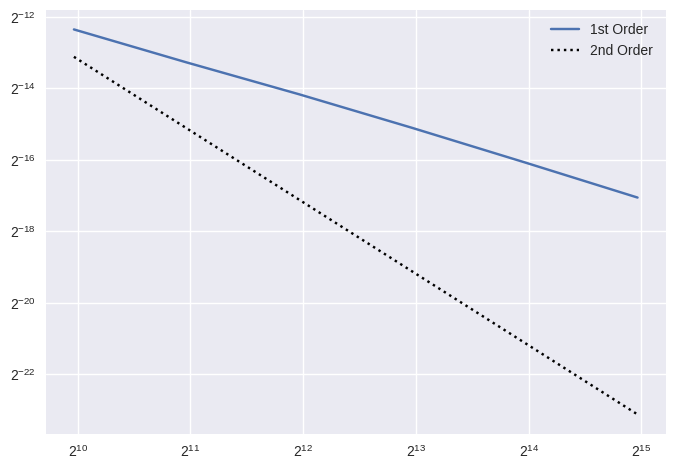

In [6]:
N = 256
K_vals = [1000, 2000, 4000, 8000, 16000, 32000]
L = 20
error1, error2 = [], []
for K in K_vals:
    states1, t_grid1, x_grid1 = time_evolve(soliton_potential, soliton_initial_wave, N, L, K, T, f, ord=1)
    states2, t_grid2, x_grid2 = time_evolve(soliton_potential, soliton_initial_wave, N, L, K, T, f, ord=2)
    error1.append(np.sqrt(np.sum(np.abs(states1[-1, :] - true_sol(x_grid1, T))**2))/len(x_grid1))
    error2.append(np.sqrt(np.sum(np.abs(states2[-1, :] - true_sol(x_grid2, T))**2))/len(x_grid2))
plt.loglog(K_vals, error1, base=2)
plt.loglog(K_vals, error2, base=2, linestyle=':', color='k')
plt.legend(['1st Order', '2nd Order'])
plt.show()

# Periodic Gaussian

In [12]:
k0=.5
sigma = .5
mu = 0
L = 10
def gaussian(x, t):
    parT = 1/(sigma*np.sqrt(2*np.pi)*np.sqrt(1+2.0*1j*t/np.square(sigma)))
    part2 = np.exp(-np.square(k0)/4)*np.exp(-np.square((x-mu)/(np.sqrt(2)*sigma)-1j*k0/2)/(1+2*1j*t/np.square(sigma)))
    part3 = np.sqrt(sigma)*np.sqrt(2)*np.sqrt(np.sqrt(np.pi))
    part4 = parT * part2 * part3
    return part4

def solution_gaussian(x, t):
    part0 = gaussian(x, t)
    parT = gaussian(x + L, t) + gaussian(x - L, t)
    part2 = gaussian(x + 2*L, t) + gaussian(x - 2*L, t)
    part3 = gaussian(x + 3*L, t) + gaussian(x - 3*L, t)
    part4 = gaussian(x + 4*L, t) + gaussian(x - 4*L, t)
    part5 = gaussian(x + 5*L, t) + gaussian(x - 5*L, t)
    part6 = gaussian(x + 6*L, t) + gaussian(x - 6*L, t)
    part7 = gaussian(x + 7*L, t) + gaussian(x - 7*L, t)
    part8 = gaussian(x + 8*L, t) + gaussian(x - 8*L, t)
    part9 = part0 + parT + part2 + part3 + part4 + part5 + part6 + part7 + part8
    return part9 / np.linalg.norm(part9)

working on time evolution: 100%|██████████| 100/100 [00:00<00:00, 22858.49it/s]

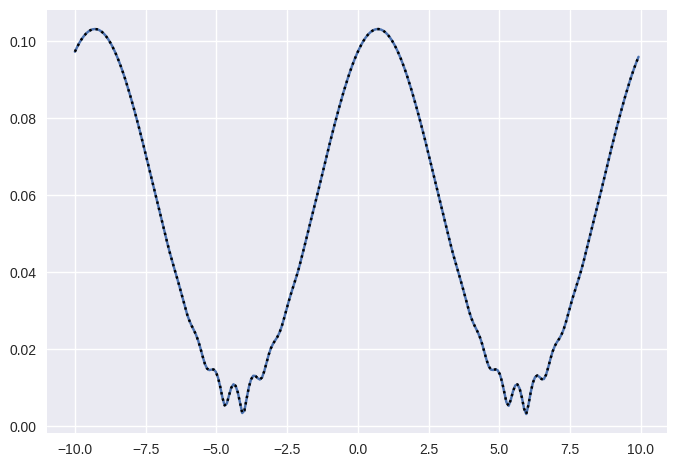

In [13]:
gaussian_potential = lambda x: 0
gaussian_initial_wave = lambda x: solution_gaussian(x, 0)
f = lambda input: 0
T = .5
states, t_grid, x_grid  = time_evolve(gaussian_potential, gaussian_initial_wave, 2**8+1, L, 100, T, f, ord=1, D=1)
dx = x_grid[1] - x_grid[0]

plt.plot(x_grid , np.abs(states[-1, :]))
plt.plot(x_grid , np.abs(solution_gaussian(x_grid , T)), ':k')
plt.show()

working on time evolution: 100%|██████████| 512/512 [00:00<00:00, 5171.77it/s]


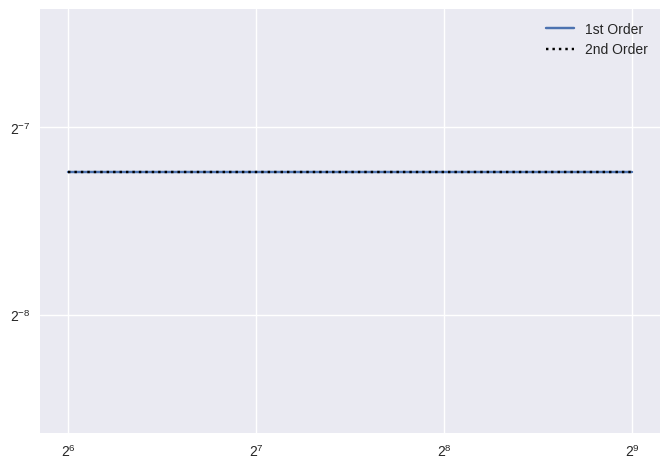

In [14]:
K_vals = [2**j for j in range(6, 10)]
N = 2**12
L = 10
error1, error2 = [], []
for K in K_vals:
    states1, t_grid1, x_grid1 = time_evolve(gaussian_potential, gaussian_initial_wave, N, L, K, T, f, ord=1, D=1)
    states2, t_grid2, x_grid2 = time_evolve(gaussian_potential, gaussian_initial_wave, N, L, K, T, f, ord=2, D=1)
    error1.append(np.sqrt(np.sum(np.abs(states1[-1, :] - true_sol(x_grid1, T))**2))/len(x_grid1))
    error2.append(np.sqrt(np.sum(np.abs(states2[-1, :] - true_sol(x_grid2, T))**2))/len(x_grid2))
plt.loglog(K_vals, error1, base=2)
plt.loglog(K_vals, error2, base=2, linestyle=':', color='k')
plt.legend(['1st Order', '2nd Order'])
plt.axis('equal')
plt.show()